Department of Physics, University of Pisa (AA 2022-2023)

### Multimessenger Physics Laboratory tutorial series



## Tutorial 05 - Putting all together: Pandas and FITS files
#### (M. Razzano, Jan, 2023)

In this tutorial we will learn how to read and convert FITS files to a format readable by the Python Data Analysis Library (pandas), and use pandas to manipulate data. The dataset that we will use is the Fermi Large Area Telescope 3 Catalog

More information can be found on the [Official Page of Pandas](https://pandas.pydata.org) and the [Astropy Data Tables](https://docs.astropy.org/en/stable/table/)

In [1]:
#import Numpy
import os
import numpy as np
import pandas as pd

# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

#Now, import the FITS module inside Astropy
from astropy.io import fits

#Define the various directories
tutorials_dir = os.getcwd()

#using dirname you can go up of one directory
main_dir = os.path.dirname(tutorials_dir)

#then use join to define variables pointing to subdirectories
data_dir = os.path.join(main_dir,"data")

print("Project main dir is %s" % main_dir)
print("Data dir is %s" %data_dir)
print("Tutorials dir is %s" %tutorials_dir)

Project main dir is /home/jovyan/astrophysics_2023/homework/homework-02---data-manipulation-with-pandas-hussainkitagawa
Data dir is /home/jovyan/astrophysics_2023/homework/homework-02---data-manipulation-with-pandas-hussainkitagawa/data
Tutorials dir is /home/jovyan/astrophysics_2023/homework/homework-02---data-manipulation-with-pandas-hussainkitagawa/tutorials


In [2]:
#we can create a results dir, if it is not here
results_dir = os.path.join(main_dir,"results")

if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    
print("Results dir is %s" %results_dir)
#PLEASE NOTE - after that, you should "git add" this directory as well

Results dir is /home/jovyan/astrophysics_2023/homework/homework-02---data-manipulation-with-pandas-hussainkitagawa/results


In [3]:
#Read the file and convert the Source table to a Pandas Dataframe

#We use as an example the Fermi LAT 4-year Catalog (3FGL) of gamma-ray sources detected by the Fermi Large Area Telescope.
# More details in "FERMI LARGE AREA TELESCOPE THIRD SOURCE CATALOG", Acero et al. (Fermi-LAT Collaboration), 2015, ApJS  
input_filename = os.path.join(data_dir,"fermi_lat_3fgl_gll_psc_v16.fits")

#First, you can open the file and check the information in it
fits_info = fits.open(input_filename)

#...like the number of HDU, in this case 5
fits_info.info()

Filename: /home/jovyan/astrophysics_2023/homework/homework-02---data-manipulation-with-pandas-hussainkitagawa/data/fermi_lat_4fgl_gll_psc_v22.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  LAT_Point_Source_Catalog    1 BinTableHDU    482   5065R x 84C   [18A, E, E, E, E, E, E, E, E, E, E, I, 18A, E, E, E, E, E, E, 17A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 7E, 14E, 7E, 7E, E, E, E, E, E, E, D, E, 8E, 16E, 8E, E, E, E, E, E, E, D, E, 48E, 96E, 48E, 18A, 18A, 18A, 18A, 18A, A, 26A, 5A, 5A, 28A, 26A, E, E, D, D, E, I]   
  2  ExtendedSources    1 BinTableHDU     74   75R x 11C   [17A, E, E, E, E, 11A, E, E, E, 11A, 24A]   
  3  ROIs          1 BinTableHDU    119   1748R x 12C   [I, E, E, E, E, E, E, E, E, E, E, E]   
  4  Components    1 BinTableHDU     53   15R x 9C   [E, E, I, I, E, E, E, I, I]   
  5  EnergyBounds    1 BinTableHDU     75   19R x 10C   [E, E, E, I, I, E, E, E, I, I]   
 

In [4]:
#Now, we want to read the HDU 1. We can do by specifying the ext parameter
data, header = fits.getdata(input_filename, ext=1,header=True)

#and we can look at the header
data.columns

ColDefs(
    name = 'Source_Name'; format = '18A'
    name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLON'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLAT'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'Conf_95_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'ROI_num'; format = 'I'; null = 16959
    name = 'Extended_Source_Name'; format = '18A'
    name = 'Signif_Avg'; format = 'E'; disp = 'F8.3'
    name = 'Pivot_Energy'; format = 'E'; unit = 'MeV'; disp = 'F10.2'
    name = 'Flux1000'; format = 'E'; uni

In [5]:
#Now convert to an astropy Table

#Now we convert the data to a Astropy Table object
from astropy.table import Table

sources_data = Table(data)
print("Data contains %d LAT sources" % len(sources_data))

#Remove the Flux_History and Unc_Flux_History columns
sources_data.remove_column("Flux_History")
sources_data.remove_column("Unc_Flux_History")

for ci in sources_data.colnames:
    if len(sources_data[ci].shape)>1:
        sources_data.remove_column(ci)
        print("Removing %s " % ci)
        
sources_data.colnames

Data contains 5065 LAT sources
Removing Flux_Band 
Removing Unc_Flux_Band 
Removing nuFnu_Band 
Removing Sqrt_TS_Band 
Removing Sqrt_TS_History 
Removing Flux2_History 
Removing Unc_Flux2_History 
Removing Sqrt_TS2_History 


['Source_Name',
 'RAJ2000',
 'DEJ2000',
 'GLON',
 'GLAT',
 'Conf_68_SemiMajor',
 'Conf_68_SemiMinor',
 'Conf_68_PosAng',
 'Conf_95_SemiMajor',
 'Conf_95_SemiMinor',
 'Conf_95_PosAng',
 'ROI_num',
 'Extended_Source_Name',
 'Signif_Avg',
 'Pivot_Energy',
 'Flux1000',
 'Unc_Flux1000',
 'Energy_Flux100',
 'Unc_Energy_Flux100',
 'SpectrumType',
 'PL_Flux_Density',
 'Unc_PL_Flux_Density',
 'PL_Index',
 'Unc_PL_Index',
 'LP_Flux_Density',
 'Unc_LP_Flux_Density',
 'LP_Index',
 'Unc_LP_Index',
 'LP_beta',
 'Unc_LP_beta',
 'LP_SigCurv',
 'PLEC_Flux_Density',
 'Unc_PLEC_Flux_Density',
 'PLEC_Index',
 'Unc_PLEC_Index',
 'PLEC_Expfactor',
 'Unc_PLEC_Expfactor',
 'PLEC_Exp_Index',
 'Unc_PLEC_Exp_Index',
 'PLEC_SigCurv',
 'Npred',
 'Variability_Index',
 'Frac_Variability',
 'Unc_Frac_Variability',
 'Signif_Peak',
 'Flux_Peak',
 'Unc_Flux_Peak',
 'Time_Peak',
 'Peak_Interval',
 'Variability2_Index',
 'Frac2_Variability',
 'Unc_Frac2_Variability',
 'Signif2_Peak',
 'Flux2_Peak',
 'Unc_Flux2_Peak',
 'Ti

In [14]:
#And then to a Pandas dataframe
sources_df = sources_data.to_pandas()
sources_df.sample(5)
sources_df

,Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,...,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
0,4FGL J0000.3-7355,0.098300,-73.921997,307.708984,-42.729538,0.032378,0.031453,-62.700001,0.0525,0.0510,...,,,,,0.000000,0.000000,NaN,NaN,NaN,0
1,4FGL J0001.2+4741,0.312600,47.685902,114.250198,-14.338059,0.036880,0.033180,-45.900002,0.0598,0.0538,...,bcu,,B3 2358+474,,0.996097,0.938563,0.329341,47.700201,8.400000e-07,0
2,4FGL J0001.2-0747,0.315100,-7.797100,89.032722,-67.305008,0.018440,0.017577,64.099998,0.0299,0.0285,...,bll,,PMN J0001-0746,,0.997014,0.932932,0.325104,-7.774145,1.800000e-07,0
3,4FGL J0001.5+2113,0.381500,21.218300,107.649353,-40.167652,0.026026,0.023991,-60.520000,0.0422,0.0389,...,fsrq,,TXS 2358+209,,0.998049,0.958182,0.384877,21.226743,3.400000e-07,0
4,4FGL J0001.6-4156,0.416500,-41.942501,334.226349,-72.028549,0.042678,0.032378,44.090000,0.0692,0.0525,...,bcu,,2MASS J00013275-4155252,,0.996336,0.854569,0.386480,-41.923705,6.900000e-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5060,4FGL J2359.0-3038,359.771912,-30.636700,12.809109,-78.024170,0.014061,0.013568,24.260000,0.0228,0.0220,...,bll,,H 2356-309,,0.999334,0.995549,359.782931,-30.627965,1.100000e-06,0
5061,4FGL J2359.1+1719,359.775604,17.322500,105.517410,-43.772465,0.033427,0.031268,-18.990000,0.0542,0.0507,...,bcu,,NVSS J235901+171926,,NaN,0.000000,359.754880,17.323781,7.100000e-07,0
5062,4FGL J2359.3-2049,359.835693,-20.818899,58.090145,-76.542862,0.024607,0.021462,-73.900002,0.0399,0.0348,...,bll,,TXS 2356-210,,0.994474,0.971529,359.831391,-20.798897,1.000000e-06,0
5063,4FGL J2359.3+1444,359.838989,14.749800,104.564713,-46.256252,0.136728,0.088377,-65.400002,0.2217,0.1433,...,,agn,,SDSS J23593+1448,0.240000,0.000000,359.825012,14.814700,4.500000e-03,0


<h2>Investigating the 3FGL Catalog</h2>

Can you answer these questions?

<ul>
    <li>How many sources are in the catalog?
    <li>How many classes are in the catalog? (use CLASS1 column)
    <li>How many unidentified?
    <li>Can you plot the sky distribution in Galactic Coordinates of identified and unidentified sources?
    <li> what is the galactic latitude distributions of pulsars (PSR) vs blazars (BLL+FSRQ+BCU)?
</ul>

In [7]:
n_sources = len(sources_df)
print("N sources = %d" % n_sources)

#how many classes? We use the unique function of numpy on the CLASS 1
src_class = np.unique(sources_df["CLASS1"])

print("Found %d Classes: ",len(src_class),src_class)

N sources = 5065
Found %d Classes:  35 ['     ' 'AGN  ' 'BCU  ' 'BIN  ' 'BLL  ' 'FSRQ ' 'GAL  ' 'HMB  ' 'LMB  '
 'NLSY1' 'NOV  ' 'PSR  ' 'PWN  ' 'RDG  ' 'SFR  ' 'SNR  ' 'agn  ' 'bcu  '
 'bll  ' 'css  ' 'fsrq ' 'gal  ' 'glc  ' 'hmb  ' 'lmb  ' 'nlsy1' 'psr  '
 'pwn  ' 'rdg  ' 'sbg  ' 'sey  ' 'snr  ' 'spp  ' 'ssrq ' 'unk  ']


In [8]:
#some class names are lowercase, make all uppercase

sources_df["CLASS1"] = sources_df["CLASS1"].str.upper()

#re-define the class names one time...
src_class = np.unique(sources_df["CLASS1"])
print("Found %d Classes: ",len(src_class),src_class)

#Also, remove the blank spaces, using the rstrip function
#sources_df["CLASS1"] = sources_df["CLASS1"].str.rstrip("")
#sources_df["CLASS1"] = sources_df["CLASS1"].str.strip(" ")

#print("Cleaned class names ",src_class)


Found %d Classes:  23 ['     ' 'AGN  ' 'BCU  ' 'BIN  ' 'BLL  ' 'CSS  ' 'FSRQ ' 'GAL  ' 'GLC  '
 'HMB  ' 'LMB  ' 'NLSY1' 'NOV  ' 'PSR  ' 'PWN  ' 'RDG  ' 'SBG  ' 'SEY  '
 'SFR  ' 'SNR  ' 'SPP  ' 'SSRQ ' 'UNK  ']


In [9]:
#still, class names contains blank spaces, let's get rid of them
sources_df["CLASS1"] = sources_df["CLASS1"].str.strip(" ")
#re-define the class names one time...
src_class = np.unique(sources_df["CLASS1"])

print("Found %d Classes: ",len(src_class),src_class)

Found %d Classes:  23 ['' 'AGN' 'BCU' 'BIN' 'BLL' 'CSS' 'FSRQ' 'GAL' 'GLC' 'HMB' 'LMB' 'NLSY1'
 'NOV' 'PSR' 'PWN' 'RDG' 'SBG' 'SEY' 'SFR' 'SNR' 'SPP' 'SSRQ' 'UNK']


In [10]:
#How many unidentified?  
mask_unid = sources_df["CLASS1"]==""
print(mask_unid[:20])

print("Num unid sources: %d" % len(sources_df[mask_unid]))

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13     True
14    False
15     True
16    False
17    False
18     True
19     True
Name: CLASS1, dtype: bool
Num unid sources: 1336


In [11]:
print("10 Random UNID sources")
sources_df[mask_unid].sample(2)

10 Random UNID sources


,Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,...,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
1111,4FGL J0611.4-4722,92.853798,-47.382801,254.974854,-26.120237,0.076783,0.050140,0.920000,0.1245,0.0813,...,,,,,0.0,0.0,NaN,NaN,NaN,0
3683,4FGL J1747.0-3505,266.770905,-35.098900,354.889496,-3.462644,0.031576,0.027568,54.689999,0.0512,0.0447,...,,,,,0.0,0.0,NaN,NaN,NaN,6


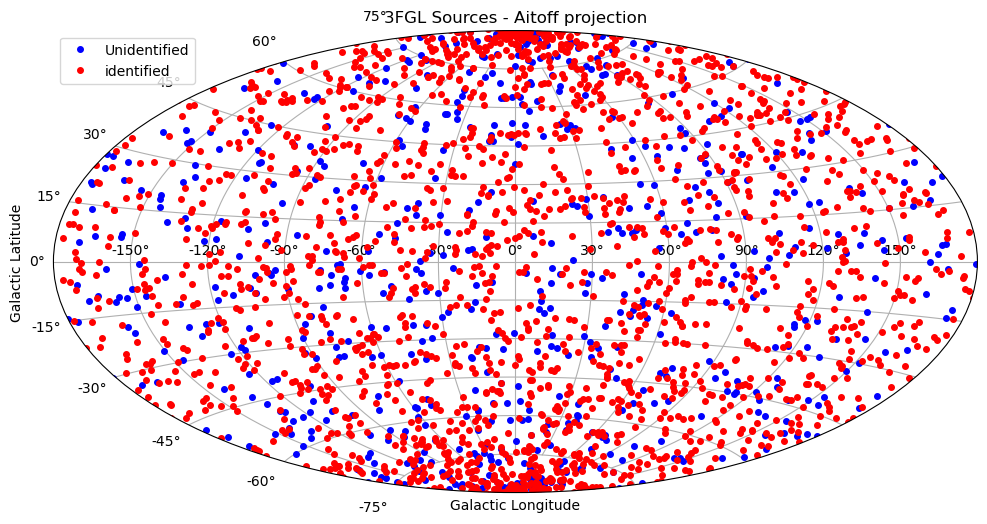

<Figure size 640x480 with 0 Axes>

In [12]:
#Plot Galactic sky distribution 
plt.figure(1,figsize=(12,6))
plt.subplot(111, projection="aitoff")
plt.grid(True)
plt.plot(sources_df[mask_unid]["GLON"],sources_df[mask_unid]["GLAT"], 'o', markersize=4, color="b",label="Unidentified")


#The identified are the NOT of the mask, that can be obtained with np.invert
mask_id = np.invert(mask_unid)
plt.plot(sources_df[mask_id]["GLON"],sources_df[mask_id]["GLAT"], 'o', markersize=4, color="r",label="identified")
plt.xlabel("Galactic Longitude")
plt.ylabel("Galactic Latitude")
plt.title("3FGL Sources - Aitoff projection")

plt.legend()
plt.show()

#we can save the plots in the results dir
out_name = os.path.join(results_dir,"id_vs_unid_skymap.png")
plt.savefig(out_name)

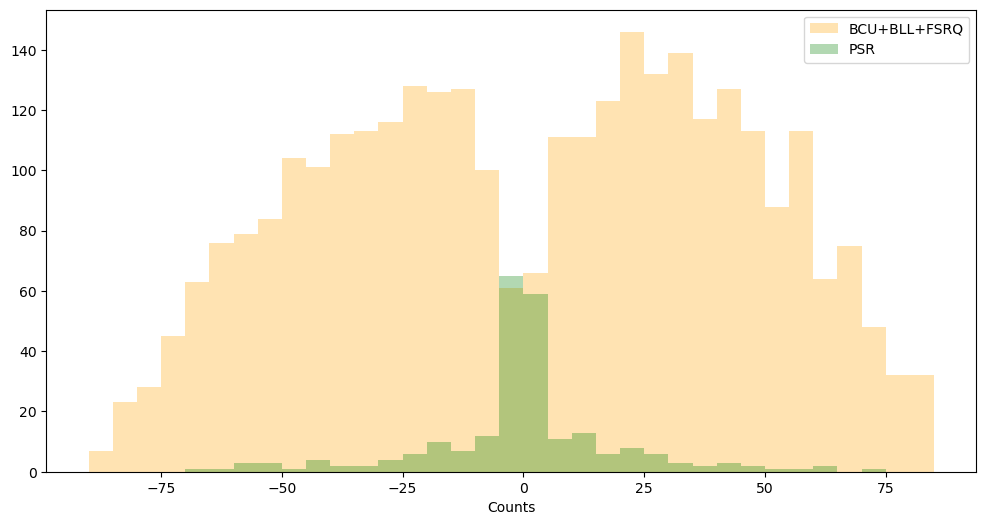

In [13]:
#PLot the GLAT distribution of pulsars vs BLL

#How many unidentified? Use the logic operator |
mask_psr = sources_df["CLASS1"]=="PSR"
mask_blazar = (sources_df["CLASS1"]=="BCU") | (sources_df["CLASS1"]=="BLL") | (sources_df["CLASS1"]=="FSRQ")

#Plot an histogram
plt.figure(2,figsize=(12,6))

b_bins=np.arange(-90,90,5)

plt.hist(sources_df[mask_blazar]["GLAT"],bins=b_bins,color="orange",label="BCU+BLL+FSRQ",alpha=0.3)
plt.hist(sources_df[mask_psr]["GLAT"],bins=b_bins,color="green",label="PSR",alpha=0.3)
plt.xlabel("Galactic Latitude")
plt.ylabel("Counts")
plt.legend()

#we can save the plots in the results dir
out_name = os.path.join(results_dir,"unid_distribution.png")
plt.savefig(out_name)